# Pingouin

- Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. Some of its main features are listed below. 

        1. ANOVAs: N-ways, repeated measures, mixed, ancova

        2. Pairwise post-hocs tests (parametric and non-parametric) and pairwise correlations

        3. Robust, partial, distance and repeated measures correlations

        4. Linear/logistic regression and mediation analysis

        5. Bayes Factors

        6. Multivariate tests

        7. Reliability and consistency

        8. Effect sizes and power analysis

        9. Parametric/bootstrapped confidence intervals around an effect size or a correlation coefficient

        10. Circular statistics

        11. Chi-squared tests

        12. Plotting: Bland-Altman plot, Q-Q plot, paired plot, robust correlation…

In [1]:
! pip install pingouin

  Created wheel for pingouin: filename=pingouin-0.3.11-py3-none-any.whl size=203323 sha256=b6698734317a92e88d5f566854199b53848531ef8cd52340a86429468c3db0ca
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\74\6d\d2\9320ff7695f6983f4394c10630792f4bd4c8351facfd39b649
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=19adffaa8ab2ff858f0c32766300a90779b8904d0ff49e4af178858ab388aa05
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\d6\64\cd\32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


ERROR: xarray 0.17.0 has requirement pandas>=0.25, but you'll have pandas 0.24.2 which is incompatible.


# 1. T-test

In [2]:
import numpy as np
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30

x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,58,two-sided,0.001222,"[-1.68, -0.43]",0.878059,26.155,0.916807


# 2. Pearson’s correlation

In [3]:
pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.594785,"[0.3, 0.79]",0.353769,0.3059,0.000527,69.723,0.950373


# 3. Test the normality of the data

In [4]:
print(pg.normality(x))                                    # Univariate normality
print(pg.multivariate_normality(np.column_stack((x, y)))) # Multivariate normality

          W      pval  normal
0  0.985831  0.950477    True
HZResults(hz=0.32439653736062, pval=0.7523511059223205, normal=True)


# 4. Q-Q plot

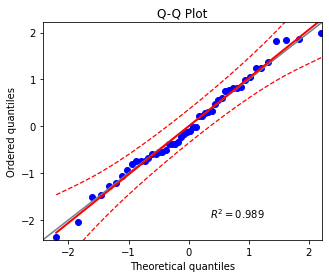

In [5]:
np.random.seed(123)
x = np.random.normal(size=50)
ax = pg.qqplot(x, dist='norm')

# Anova

## One-way ANOVA

In [6]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
print(aov)

   Source          SS   DF        MS         F   p-unc       np2
0   Group    5.459963    1  5.459963  5.243656  0.0232  0.028616
1  Within  185.342729  178  1.041251       NaN     NaN       NaN


## Repeated measures ANOVA

In [7]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.062194,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


## Two-way mixed ANOVA

In [8]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        5.460      1     58  5.460  5.052    0.028  0.080  nan
Time         7.628      2    116  3.814  4.027    0.020  0.065    0.999
Interaction  5.167      2    116  2.584  2.728    0.070  0.045  nan



#  Multiple linear regression

## Boston housing dataset

In [9]:

from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

In [10]:
pg.linear_regression(X, y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,36.459488,5.103459,7.144074,3.283439e-12,0.740643,0.73379,26.432226,46.486751
1,x1,-0.108011,0.032865,-3.286517,1.086810e-03,0.740643,0.73379,-0.172584,-0.043438
2,x2,0.046420,0.013727,3.381576,7.781097e-04,0.740643,0.73379,0.019449,0.073392
3,x3,0.020559,0.061496,0.334310,7.382881e-01,0.740643,0.73379,-0.100268,0.141385
4,x4,2.686734,0.861580,3.118381,1.925030e-03,0.740643,0.73379,0.993904,4.379563
5,x5,-17.766611,3.819744,-4.651257,4.245644e-06,0.740643,0.73379,-25.271634,-10.261589
6,x6,3.809865,0.417925,9.116140,1.979441e-18,0.740643,0.73379,2.988727,4.631004
7,x7,0.000692,0.013210,0.052402,9.582293e-01,0.740643,0.73379,-0.025262,0.026647
8,x8,-1.475567,0.199455,-7.398004,6.013491e-13,0.740643,0.73379,-1.867455,-1.083679
9,x9,0.306049,0.066346,4.612900,5.070529e-06,0.740643,0.73379,0.175692,0.436407


### These Are Some Exmple Of pingouin https://pingouin-stats.org/